## Mission 4 : Expliquer le revenu des individus en fonction de plusieurs variables explicatives

In [1]:
# import des librairies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [16]:
# chargement du fichier

df = pd.read_csv('C:\\Users\\mfila\\df_500_fin.csv')

In [17]:
df

,Unnamed: 0,country_code,G_j,income,m_j,p_j,c_i_parents
0,0,ALB,32.141019,728.89795,7297.0,0.465537,1
1,1,ALB,32.141019,728.89795,7297.0,0.465537,1
2,2,ALB,32.141019,728.89795,7297.0,0.465537,1
3,3,ALB,32.141019,728.89795,7297.0,0.465537,1
4,4,ALB,32.141019,728.89795,7297.0,0.465537,1
...,...,...,...,...,...,...,...
5799995,5799995,ZAF,68.294901,82408.55000,9602.0,0.655524,100
5799996,5799996,ZAF,68.294901,82408.55000,9602.0,0.655524,100
5799997,5799997,ZAF,68.294901,82408.55000,9602.0,0.655524,100
5799998,5799998,ZAF,68.294901,82408.55000,9602.0,0.655524,100


### 4.1. Appliquez une ANOVA sur vos données, en n’incluant comme variable explicative que le pays de l’individu. Analysez la performance du modèle.

In [18]:
code_pays=['LUX','AUT','CZE','MNE','VNM']

In [19]:
code_pays

['LUX', 'AUT', 'CZE', 'MNE', 'VNM']

In [20]:
income_pays = df[df['country_code'].isin(code_pays)]
income_pays

,Unnamed: 0,country_code,G_j,income,m_j,p_j,c_i_parents
150000,150000,AUT,29.532585,2958.0764,36193.0,0.348050,1
150001,150001,AUT,29.532585,2958.0764,36193.0,0.348050,1
150002,150002,AUT,29.532585,2958.0764,36193.0,0.348050,1
150003,150003,AUT,29.532585,2958.0764,36193.0,0.348050,1
150004,150004,AUT,29.532585,2958.0764,36193.0,0.348050,1
...,...,...,...,...,...,...,...
5649995,5649995,VNM,39.354551,9522.4660,2578.0,0.504399,100
5649996,5649996,VNM,39.354551,9522.4660,2578.0,0.504399,100
5649997,5649997,VNM,39.354551,9522.4660,2578.0,0.504399,100
5649998,5649998,VNM,39.354551,9522.4660,2578.0,0.504399,100


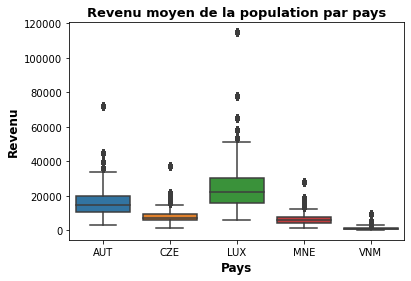

In [21]:
# Représentation des distributions par boxplot 

sns.boxplot(x="country_code", y="income", data=income_pays)
plt.title('Revenu moyen de la population par pays', fontsize=13, fontweight='bold')
plt.xlabel('Pays',fontsize=12, fontweight='bold')
plt.ylabel('Revenu', fontsize=12, fontweight='bold')

plt.show()

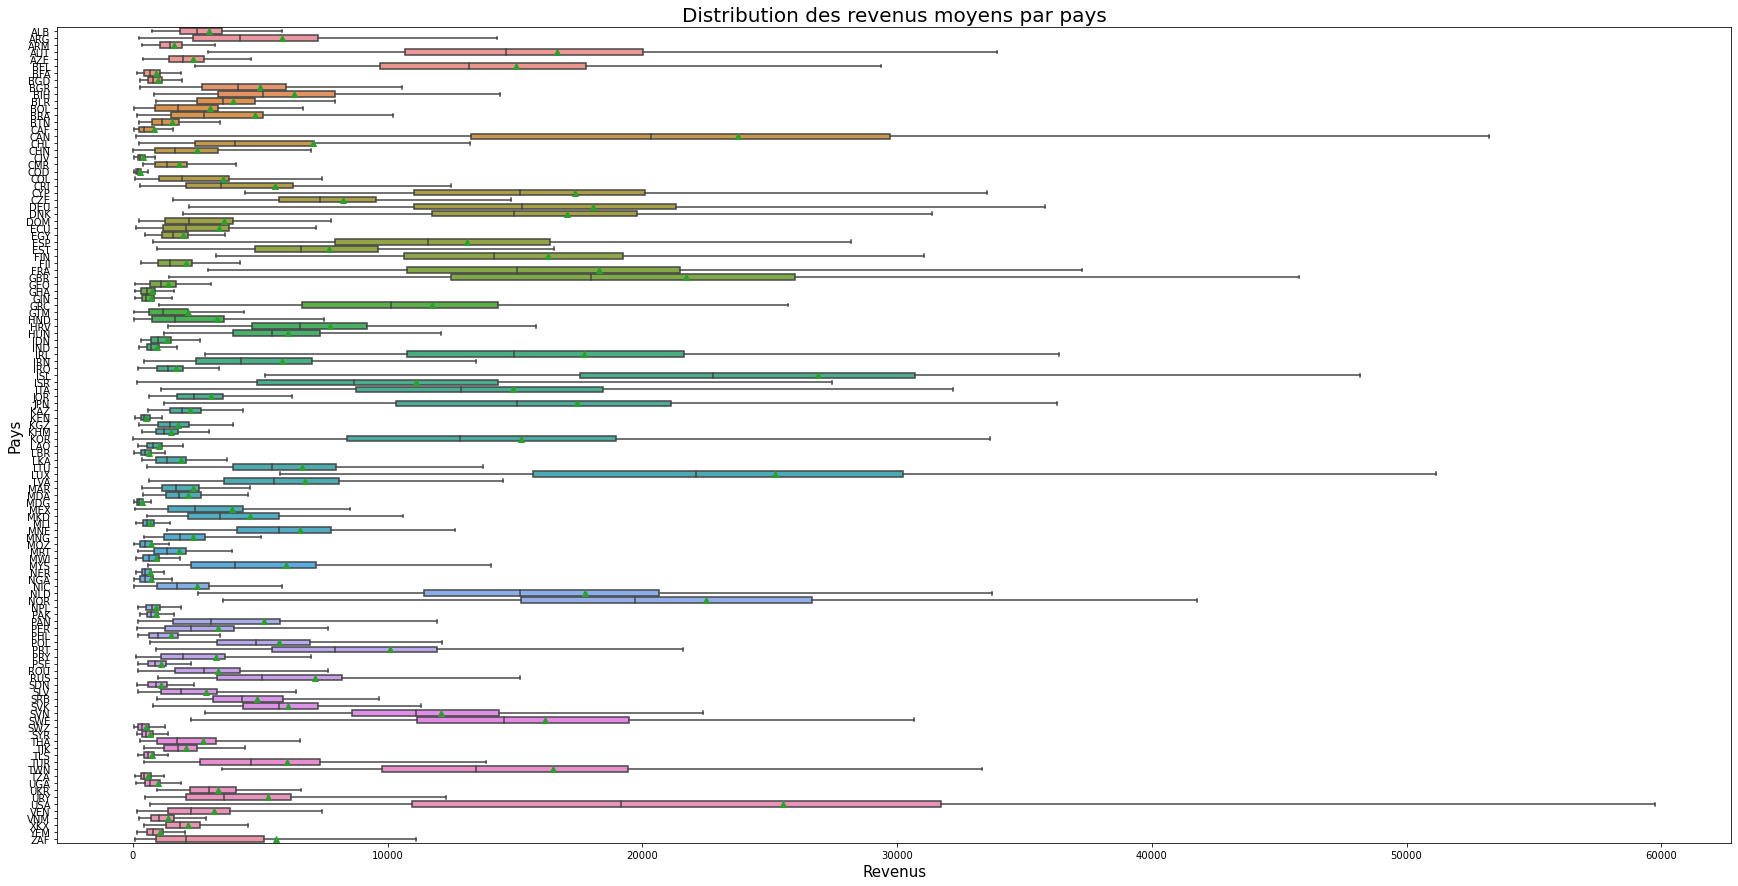

In [22]:
plt.figure(figsize=(30,15))

sns.boxplot(
    data=df, 
    x='income', y='country_code', 
    showfliers=False, showmeans=True)

plt.title("Distribution des revenus moyens par pays", size=20)
plt.ylabel("Pays", size=15)
plt.xlabel("Revenus", size=15)

plt.show()

In [23]:
df_model = df.copy() 

In [24]:
anova_income = smf.ols('income ~ country_code', data=df_model).fit()
print(anova_income.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 4.971e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:46:45   Log-Likelihood:            -5.9310e+07
No. Observations:             5800000   AIC:                         1.186e+08
Df Residuals:                 5799884   BIC:                         1.186e+08
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2994.8299    

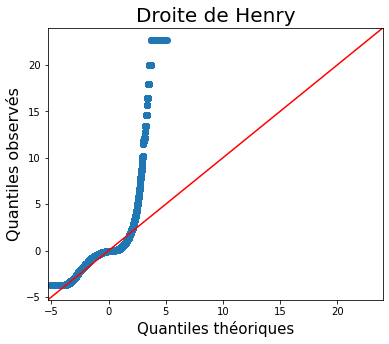

In [25]:
# droite de Henry pour une représentation graphique de la distribution de résidus

def residus_henry(model, nom, couleur, ax):
    sm.qqplot(model.resid, ax=ax, line="45", fit=True, color=couleur)
    ax.set_title("Droite de Henry", fontsize=20)
    ax.set_xlabel("Quantiles théoriques" ,fontsize=15), ax.set_ylabel("Quantiles observés", fontsize=16)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
residus_henry(anova_income, "ANOVA", "brown", ax) ; 

plt.show()

In [26]:
def test_residus_KS(model):
    MR=model.resid
    KS=st.ks_2samp(MR,list(np.random.normal(MR.mean(), MR.std(), len(MR))))
    print("TEST DE KOLMOGOROV-SMIRNOV:", " statistic =", KS[0], " pvalue =", KS[1])

test_residus_KS(anova_income) # ne suit pas une loi normale

TEST DE KOLMOGOROV-SMIRNOV:  statistic = 0.2468512068965517  pvalue = 0.0


In [27]:
# Vérification de l'homoscédasticité des résidus : Breusch-Pagan

def test_residus_BP(model):
    BP=sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
    print("TEST DE BREUSCH-PAGAN:", " statistic =", BP[0], " pvalue =", BP[1])
    
test_residus_BP(anova_income) # hétérogénéité

TEST DE BREUSCH-PAGAN:  statistic = -61491.47138140139  pvalue = 1.0


In [28]:
del df_model["Unnamed: 0"]

In [29]:
# Ajout des colonnes de log

df_model["ln_income"] = np.log(df_model["income"])
df_model["ln_m_j"] = np.log(df_model["m_j"])

In [30]:
df_model.head(2)

,country_code,G_j,income,m_j,p_j,c_i_parents,ln_income,ln_m_j
0,ALB,32.141019,728.89795,7297.0,0.465537,1,6.591534,8.895219
1,ALB,32.141019,728.89795,7297.0,0.465537,1,6.591534,8.895219


In [31]:
df_model.to_csv('C:\\Users\\mfila\\df_model.csv')

In [2]:
df_model = pd.read_csv('C:\\Users\\mfila\\df_model.csv')

In [3]:
# Anova après le passage de la colonne income en logarithme
# smf calls the package Statsmodel
# ols tells Python we are using an Ordinary Least Square (OLS) regression (a type linear regression)
# .fit() tells Python we want to fit our function (“run the function”)

anova_income_log = smf.ols('ln_income ~ country_code', data=df_model).fit()
print(anova_income_log.summary())

                            OLS Regression Results                            
Dep. Variable:              ln_income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.358e+05
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:46:37   Log-Likelihood:            -6.3135e+06
No. Observations:             5800000   AIC:                         1.263e+07
Df Residuals:                 5799884   BIC:                         1.263e+07
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.8517    

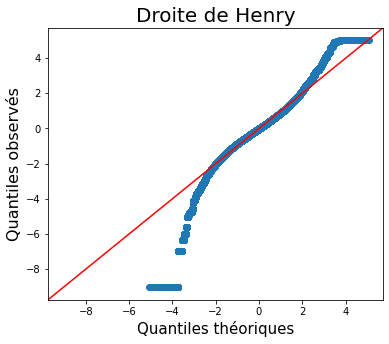

In [7]:
# droite de Henry pour une représentation graphique de la distribution de résidus

def residus_henry(model, nom, couleur, ax):
    sm.qqplot(model.resid, ax=ax, line="45", fit=True, color=couleur)
    ax.set_title("Droite de Henry", fontsize=20)
    ax.set_xlabel("Quantiles théoriques" ,fontsize=15), ax.set_ylabel("Quantiles observés", fontsize=16)
fig, ax = plt.subplots(1, 1, figsize=(6, 5)); 
residus_henry(anova_income_log, "ANOVA", "brown", ax)

In [6]:
def test_residus_KS(model):
    MR=model.resid
    KS=st.ks_2samp(MR,list(np.random.normal(MR.mean(), MR.std(), len(MR))))
    print("TEST DE KOLMOGOROV-SMIRNOV:", " statistic =", KS[0], " pvalue =", KS[1])
test_residus_KS(anova_income_log) # ne suit pas une loi normale

TEST DE KOLMOGOROV-SMIRNOV:  statistic = 0.033990000000000076  pvalue = 0.0
